# 1) Data Loading and Inspection

In [1]:
import pandas as pd

# Load the dataset
penguins_data_path = 'C:/Users/krish/Desktop/1 AI COURSEWORK/penguins.csv'
penguins = pd.read_csv(penguins_data_path)

# Display basic information and the first few rows
penguins.info()
penguins.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


# 2) Data Cleaning

In [2]:
# Filling missing values for numerical columns with the median
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins[numerical_columns] = penguins[numerical_columns].apply(lambda x: x.fillna(x.median()))

# Filling missing values for the categorical column 'sex' with the mode
penguins['sex'] = penguins['sex'].fillna(penguins['sex'].mode()[0])

# 3) Exploratory Data Analysis

C:\Users\krish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\krish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\krish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\krish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

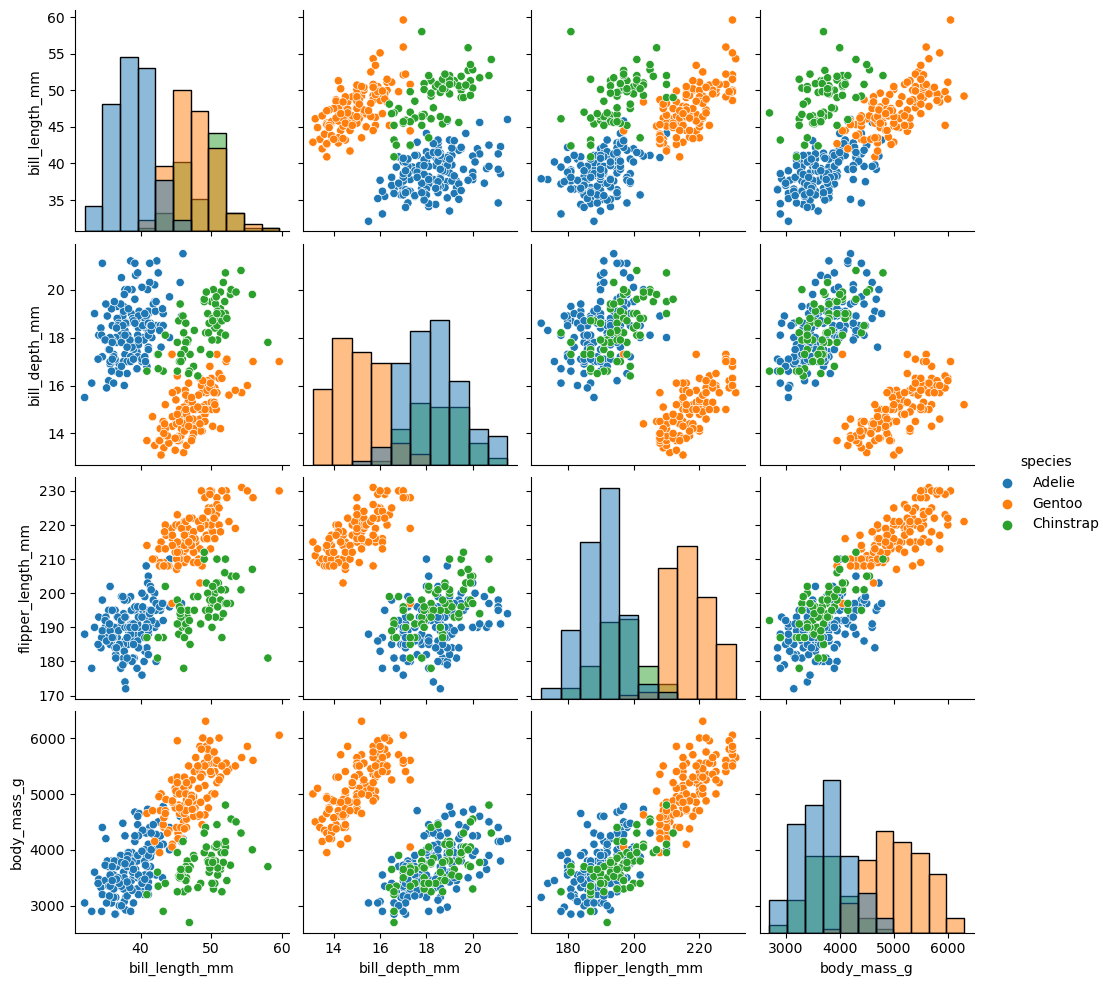

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing relationships using pair plots with different colors for each species
sns.pairplot(penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species']], 
             hue='species', diag_kind='hist')
plt.show()

# 4) Data Scaling for Clustering

In [4]:
from sklearn.preprocessing import StandardScaler

# Scaling the selected features
scaler = StandardScaler()
features_selected = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
penguins_scaled = scaler.fit_transform(penguins[features_selected])

# 5) k-Means Clustering and Elbow Method

C:\Users\krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\krish\anaconda3\Lib\site-packages\sklearn\clust

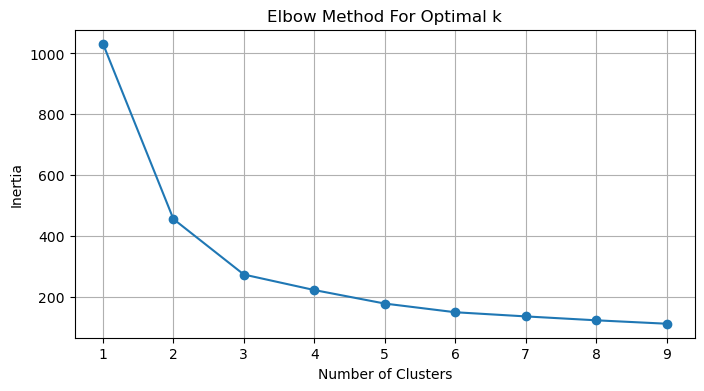

In [5]:
from sklearn.cluster import KMeans

# Applying the Elbow method to determine the optimal number of clusters
inertia = []
range_clusters = range(1, 10)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(penguins_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# 6) Final Clustering and Visualization

C:\Users\krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


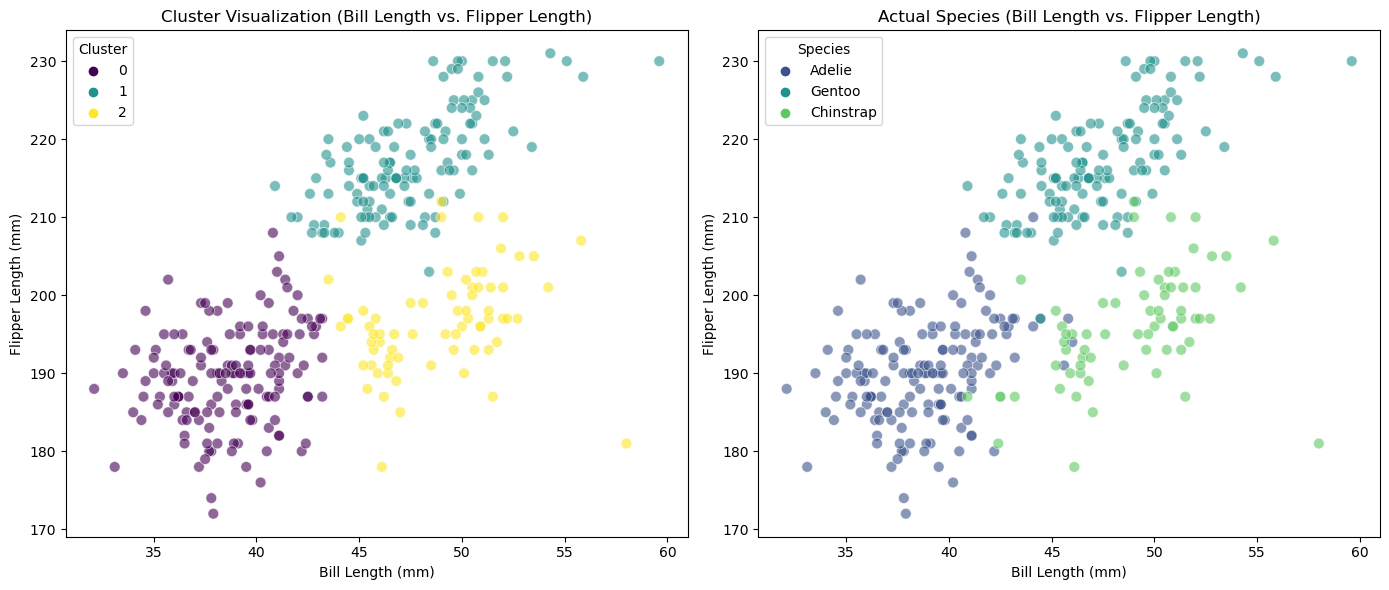

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Increase overall figure size to give more space to each plot
plt.figure(figsize=(14, 6))

# Applying k-means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
penguins['cluster'] = kmeans.fit_predict(penguins_scaled)

# Subplot 1: Cluster Visualization
plt.subplot(1, 2, 1)
sns.scatterplot(x='bill_length_mm', y='flipper_length_mm', hue='cluster', data=penguins, palette='viridis', alpha=0.6, s=60)
plt.title('Cluster Visualization (Bill Length vs. Flipper Length)')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.legend(title='Cluster', loc='upper left')

# Subplot 2: Actual Species
plt.subplot(1, 2, 2)
sns.scatterplot(x='bill_length_mm', y='flipper_length_mm', hue='species', data=penguins, palette='viridis', alpha=0.6, s=60)
plt.title('Actual Species (Bill Length vs. Flipper Length)')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.legend(title='Species', loc='upper left')

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

# 7) Classification Model Training and Evaluation

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Splitting the dataset
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = penguins['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# k-NN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)  # Adjusted max_iter for convergence
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_test)

# Reports
knn_report = classification_report(y_test, knn_predictions)
logreg_report = classification_report(y_test, logreg_predictions)
print(knn_report)
print(logreg_report)

              precision    recall  f1-score   support

      Adelie       0.67      0.97      0.79        30
   Chinstrap       0.67      0.14      0.24        14
      Gentoo       1.00      0.92      0.96        25

    accuracy                           0.78        69
   macro avg       0.78      0.68      0.66        69
weighted avg       0.79      0.78      0.74        69

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



# 8) Baseline Model Comparison

In [8]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Baseline model
baseline_model = DummyClassifier(strategy="most_frequent")
baseline_model.fit(X_train, y_train)
baseline_predictions = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, baseline_predictions)
print("Baseline Accuracy:", baseline_accuracy)

Baseline Accuracy: 0.43478260869565216


# 9) Parameter Tuning for k-NN Using Cross-Validation

In [9]:
import numpy as np  # Make sure to include this at the start of your script

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Finding the best k value
k_values = range(1, 21)
k_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

best_k = k_values[np.argmax(k_scores)]
print("Best k:", best_k)

Best k: 1


# 10) Cross-Validation for Logistic Regression

In [10]:
# Cross-validation for Logistic Regression
logreg_cv_scores = cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy')
logreg_cv_mean = np.mean(logreg_cv_scores)
logreg_cv_std = np.std(logreg_cv_scores)
print("Logistic Regression CV Mean Accuracy:", logreg_cv_mean)
print("Logistic Regression CV Standard Deviation:", logreg_cv_std)

Logistic Regression CV Mean Accuracy: 0.9817460317460318
Logistic Regression CV Standard Deviation: 0.024652905306289403
